In [44]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import cartopy.crs as ccrs
import xarray as xr

from matplotlib.ticker import FormatStrFormatter

majorFormatter = FormatStrFormatter('%.1f')

In [13]:
# ds_steh = xr.open_dataset('../../../../src/VIC/samples/data/image/Stehekin/parameters/domain.stehekin.20151028.nc')
# ds_global = xr.open_dataset('../data/vic4_to_vic5_params/domain.vic.global0.5deg.20160608.nc')
# ds_livneh = xr.open_dataset('../data/vic4_to_vic5_params/domain.vic.global0.0625deg.20160608.nc')
ds_rasm = xr.open_dataset('../../../../RASM_Joe/domain.lnd.wr50a_ar9v4.100920.nc')
wrf_vic_masks = xr.open_dataset('/Users/jhamman/Dropbox/src/rasm_trunk/scripts/rasm_utils/Post_processing/fluxes/RASM_WRFVIC_GRID_MASKS_AND_METRICS.nc')
lnd_elev = wrf_vic_masks.HGT


In [53]:
# projection class
class Rasm(ccrs.Projection):

    def __init__(self):

        proj4_params = {'R': 6371200.0,
                        'lat_0': 90.0,
                        'lat_1': 90,
                        'lat_2': 90,
                        'lon_0': -114.0+360,
                        'proj': 'lcc',
                        'units': 'm',
                        'x_0': 9469302.950316086,
                        'y_0': 6201952.603370549}

        super(Rasm, self).__init__(proj4_params)

    @property
    def boundary(self):
        coords = ((self.x_limits[0], self.y_limits[0]),(self.x_limits[1], self.y_limits[0]),
                  (self.x_limits[1], self.y_limits[1]),(self.x_limits[0], self.y_limits[1]),
                  (self.x_limits[0], self.y_limits[0]))

        return ccrs.sgeom.Polygon(coords).exterior

    @property
    def threshold(self):
        return 100000.0

    @property
    def x_limits(self):
        return (0, 16423961.103252266)

    @property
    def y_limits(self):
        return (0, 12228062.194885937)

In [54]:
levels = [0, 1, 10, 25, 50, 100, 200, 400, 500, 750, 1000, 1500, 2000, 3000, ]


/Users/jhamman/anaconda/envs/xarray36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


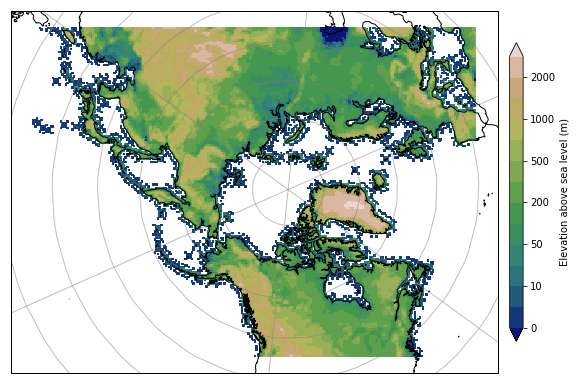

In [57]:
fig, ax = plt.subplots(figsize=(8.5, 5.5), subplot_kw=dict(projection=Rasm()))


mappable = lnd_elev.where(lnd_elev).plot.pcolormesh(
    'longitude', 'latitude', ax=ax, cmap='gist_earth',
    levels=levels, transform=ccrs.PlateCarree(),
    add_colorbar=False, extend='both')
# wrf_rvic_masks.mask_rvic_drainage.where(wrf_rvic_masks.mask_rvic_drainage > 0).plot.pcolormesh(
#     'xc', 'yc', ax=ax, cmap='gray',
#     vmin=0, vmax=1.4, transform=ccrs.PlateCarree(),
#     add_colorbar=False, alpha=0.25)
# mappable = ocean_depth.where(ocn_mask > 0).plot.pcolormesh(
#     'longitude', 'latitude', ax=ax, cmap='RdYlBu_r',
#     levels=levels, transform=ccrs.PlateCarree(),
#     add_colorbar=False, extend='both')

ax.coastlines(resolution='50m', lw=0.5, color='k')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False,
                  linewidth=1, color='gray', alpha=0.5, linestyle='-')


bbox_props = dict(boxstyle="circle,pad=0.2", fc="white", ec="k", lw=1)

cbar = plt.colorbar(mappable=mappable, orientation='vertical', shrink=0.8, pad=0.02)

cbar.set_label('Elevation above sea level (m)')

ax.legend(loc=(0.07, 0.03))

fig.tight_layout()

fig.savefig('../figs/RASM_domain_fig.png', dpi=300)